In [1]:
%pip install nibabel matplotlib numpy

  Using cached nibabel-5.3.2-py3-none-any.whl.metadata (9.1 kB)
  Using cached matplotlib-3.10.7-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached numpy-2.3.4-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached typing_extensions-4.15.0-py3-none-any.whl.metadata (3.3 kB)
  Using cached contourpy-1.3.3-cp312-cp312-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.60.1-cp312-cp312-win_amd64.whl.metadata (114 kB)
  Using cached kiwisolver-1.4.9-cp312-cp312-win_amd64.whl.metadata (6.4 kB)
  Using cached pillow-12.0.0-cp312-cp312-win_amd64.whl.metadata (9.0 kB)
  Using cached pyparsing-3.2.5-py3-none-any.whl.metadata (5.0 kB)
Using cached nibabel-5.3.2-py3-none-any.whl (3.3 MB)
Using cached matplotlib-3.10.7-cp312-cp312-win_amd64.whl (8.1 MB)
Using cached numpy-2.3.4-cp312-cp312-win_amd64.whl (12.8 MB)
Using cached contourpy-1.3.3-cp312-cp312-win_amd64.whl (226 kB)
Using cached cycler-0.12.1-py3-none-any.w

Import the required Libraries - nibabel, numpy, matplotlib

In [11]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import os
from pathlib import Path

# Set matplotlib style
plt.style.use('default')
%matplotlib inline

Define Dataset Path and Patient ID

In [12]:
# Navigate from notebooks/ up to MedBIND3D/, then into BraTS2020_training_data/
base_path = os.path.join('..', 'BraTS2020_training_data', 'MICCAI_BraTS2020_TrainingData')
patient_id = "BraTS20_Training_001"
patient_path = os.path.join(base_path, patient_id)

# Verify paths
print("="*60)
print("PATH VERIFICATION")
print("="*60)
print(f"Current working directory: {os.getcwd()}")
print(f"Absolute data path: {os.path.abspath(patient_path)}")
print(f"Patient directory exists: {os.path.exists(patient_path)}")
print("="*60)

PATH VERIFICATION
Current working directory: c:\Users\arnav\Desktop\MedBIND3D\MedBIND3D\notebooks
Absolute data path: c:\Users\arnav\Desktop\MedBIND3D\MedBIND3D\BraTS2020_training_data\MICCAI_BraTS2020_TrainingData\BraTS20_Training_001
Patient directory exists: True


Define Modality Files

In [13]:
# Define modality file paths
modalities = {
    'flair': os.path.join(patient_path, f"{patient_id}_flair.nii"),
    't1': os.path.join(patient_path, f"{patient_id}_t1.nii"),
    't1ce': os.path.join(patient_path, f"{patient_id}_t1ce.nii"),
    't2': os.path.join(patient_path, f"{patient_id}_t2.nii"),
    'seg': os.path.join(patient_path, f"{patient_id}_seg.nii")
}

print(f"\nPatient: {patient_id}")
print("Checking files...")
for mod, path in modalities.items():
    exists = "✓" if os.path.exists(path) else "✗"
    print(f"{exists} {mod.upper()}: {os.path.basename(path)}")


Patient: BraTS20_Training_001
Checking files...
✓ FLAIR: BraTS20_Training_001_flair.nii
✓ T1: BraTS20_Training_001_t1.nii
✓ T1CE: BraTS20_Training_001_t1ce.nii
✓ T2: BraTS20_Training_001_t2.nii
✓ SEG: BraTS20_Training_001_seg.nii


Load Volumes

In [14]:
# Load NIfTI volumes
nifti_objects = {}
volumes = {}

print("\n" + "="*60)
print("LOADING MRI VOLUMES")
print("="*60)

for modality, file_path in modalities.items():
    if os.path.exists(file_path):
        try:
            # Load NIfTI file
            nifti_objects[modality] = nib.load(file_path)
            
            # Convert to NumPy array
            volumes[modality] = nifti_objects[modality].get_fdata()
            
            print(f"✓ {modality.upper():6s} loaded successfully")
            print(f"  File: {os.path.basename(file_path)}")
            print(f"  Shape: {volumes[modality].shape}")
            print()
        except Exception as e:
            print(f"✗ Error loading {modality.upper()}: {str(e)}\n")
    else:
        print(f"✗ {modality.upper()} file not found")
        print(f"  Looking at: {file_path}\n")

print("="*60)

# Final check
if len(volumes) == 5:
    print("\n🎉 SUCCESS: All 5 modalities loaded!")
    print(f"Total memory: ~{sum(v.nbytes for v in volumes.values()) / 1024**2:.1f} MB")
else:
    print(f"\n⚠️  Only {len(volumes)}/5 modalities loaded")
    missing = set(modalities.keys()) - set(volumes.keys())
    if missing:
        print(f"Missing: {', '.join(missing)}")


LOADING MRI VOLUMES
✓ FLAIR  loaded successfully
  File: BraTS20_Training_001_flair.nii
  Shape: (240, 240, 155)

✓ T1     loaded successfully
  File: BraTS20_Training_001_t1.nii
  Shape: (240, 240, 155)

✓ T1CE   loaded successfully
  File: BraTS20_Training_001_t1ce.nii
  Shape: (240, 240, 155)

✓ T2     loaded successfully
  File: BraTS20_Training_001_t2.nii
  Shape: (240, 240, 155)

✓ SEG    loaded successfully
  File: BraTS20_Training_001_seg.nii
  Shape: (240, 240, 155)


🎉 SUCCESS: All 5 modalities loaded!
Total memory: ~340.6 MB


Verify Dimensions

In [15]:
print("\n" + "="*60)
print("VOLUME DIMENSIONS")
print("="*60)

for modality in ['flair', 't1', 't1ce', 't2', 'seg']:
    if modality in volumes:
        shape = volumes[modality].shape
        print(f"{modality.upper():6s}: {shape} → (Width × Height × Depth)")

print("="*60)


VOLUME DIMENSIONS
FLAIR : (240, 240, 155) → (Width × Height × Depth)
T1    : (240, 240, 155) → (Width × Height × Depth)
T1CE  : (240, 240, 155) → (Width × Height × Depth)
T2    : (240, 240, 155) → (Width × Height × Depth)
SEG   : (240, 240, 155) → (Width × Height × Depth)


Display Statistics

In [16]:
print("\n" + "="*60)
print("VOLUME STATISTICS")
print("="*60)

for modality in ['flair', 't1', 't1ce', 't2', 'seg']:
    if modality in volumes:
        vol = volumes[modality]
        print(f"\n{modality.upper()}:")
        print(f"  Min:  {vol.min():.4f}")
        print(f"  Max:  {vol.max():.4f}")
        print(f"  Mean: {vol.mean():.4f}")
        print(f"  Std:  {vol.std():.4f}")
        print(f"  Non-zero voxels: {np.count_nonzero(vol):,} ({100*np.count_nonzero(vol)/vol.size:.2f}%)")

print("\n" + "="*60)


VOLUME STATISTICS

FLAIR:
  Min:  0.0000
  Max:  625.0000
  Mean: 26.0219
  Std:  66.7654
  Non-zero voxels: 1,342,885 (15.04%)

T1:
  Min:  0.0000
  Max:  678.0000
  Mean: 53.2871
  Std:  130.7849
  Non-zero voxels: 1,342,885 (15.04%)

T1CE:
  Min:  0.0000
  Max:  1845.0000
  Mean: 62.7716
  Std:  155.0792
  Non-zero voxels: 1,342,885 (15.04%)

T2:
  Min:  0.0000
  Max:  376.0000
  Mean: 17.2514
  Std:  44.9792
  Non-zero voxels: 1,342,885 (15.04%)

SEG:
  Min:  0.0000
  Max:  4.0000
  Mean: 0.0520
  Std:  0.3527
  Non-zero voxels: 211,979 (2.37%)



Visualize All Modalities

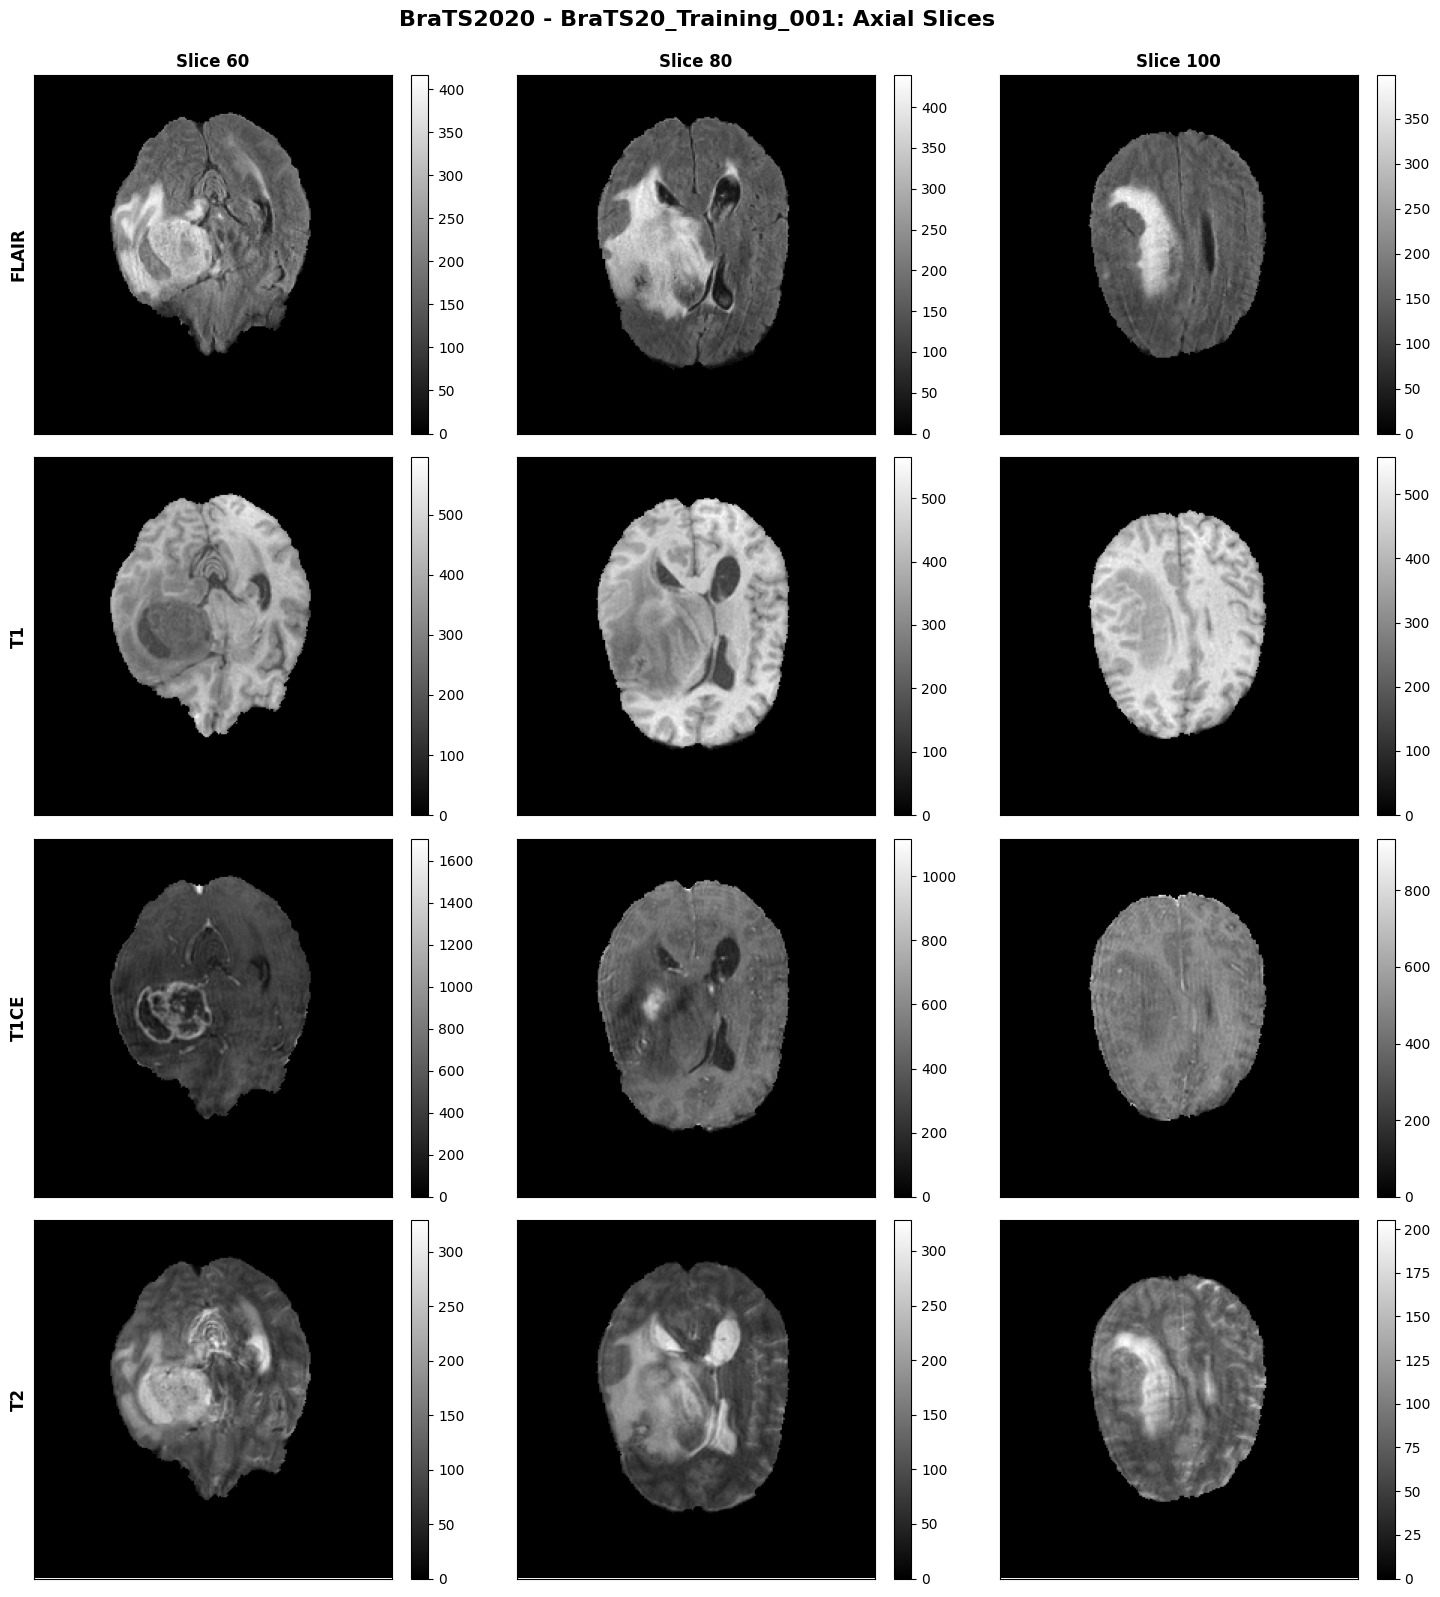

In [17]:
# Define slice indices to visualize
slice_indices = [60, 80, 100]

# Create figure for all modalities
fig, axes = plt.subplots(4, 3, figsize=(15, 16))
fig.suptitle(f'BraTS2020 - {patient_id}: Axial Slices', 
             fontsize=16, fontweight='bold', y=0.995)

modality_list = ['flair', 't1', 't1ce', 't2']

for row_idx, modality in enumerate(modality_list):
    if modality in volumes:
        for col_idx, slice_idx in enumerate(slice_indices):
            ax = axes[row_idx, col_idx]
            
            # Display axial slice
            slice_data = volumes[modality][:, :, slice_idx]
            im = ax.imshow(slice_data.T, cmap='gray', origin='lower')
            
            # Titles
            if row_idx == 0:
                ax.set_title(f'Slice {slice_idx}', fontsize=12, fontweight='bold')
            if col_idx == 0:
                ax.set_ylabel(modality.upper(), fontsize=12, fontweight='bold')
            
            ax.set_xticks([])
            ax.set_yticks([])
            
            # Colorbar
            plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)

plt.tight_layout()
plt.show()

Tumor Segmentation Overlay on FLAIR

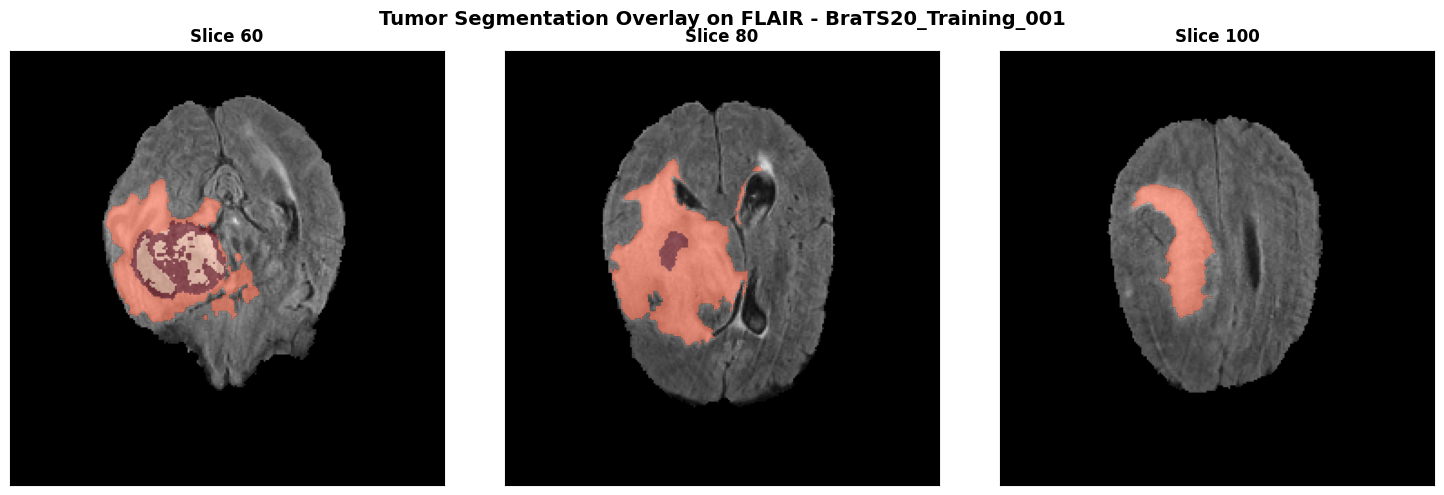


Segmentation labels present: [0. 1. 2. 4.]
Label meanings:
  0 = Background
  1 = Necrotic/Core
  2 = Edema
  4 = Enhancing Tumor


In [18]:
# Tumor overlay visualization
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle(f'Tumor Segmentation Overlay on FLAIR - {patient_id}', 
             fontsize=14, fontweight='bold')

if 'flair' in volumes and 'seg' in volumes:
    flair_volume = volumes['flair']
    seg_volume = volumes['seg']
    
    for idx, slice_idx in enumerate(slice_indices):
        ax = axes[idx]
        
        # Get slices
        flair_slice = flair_volume[:, :, slice_idx].T
        seg_slice = seg_volume[:, :, slice_idx].T
        
        # Display FLAIR background
        ax.imshow(flair_slice, cmap='gray', origin='lower', alpha=1.0)
        
        # Overlay segmentation in red
        seg_masked = np.ma.masked_where(seg_slice == 0, seg_slice)
        ax.imshow(seg_masked, cmap='Reds', origin='lower', alpha=0.6, vmin=0, vmax=4)
        
        ax.set_title(f'Slice {slice_idx}', fontsize=12, fontweight='bold')
        ax.set_xticks([])
        ax.set_yticks([])
    
    plt.tight_layout()
    plt.show()
    
    # Segmentation info
    print(f"\nSegmentation labels present: {np.unique(seg_volume)}")
    print(f"Label meanings:")
    print("  0 = Background")
    print("  1 = Necrotic/Core")
    print("  2 = Edema") 
    print("  4 = Enhancing Tumor")
else:
    print("⚠️  Cannot create overlay - missing flair or seg volume")

In [19]:
print("\n" + "="*60)
print("WEEK-1 SUMMARY")
print("="*60)
if len(volumes) == 5:
    print(f"✓ Successfully loaded all 5 volumes for {patient_id}")
    print(f"✓ Volume shape: {volumes['flair'].shape}")
    print(f"✓ Visualized slices at indices: {slice_indices}")
    
    if 'seg' in volumes:
        seg = volumes['seg']
        print(f"\nTumor Statistics:")
        print(f"  Total voxels: {seg.size:,}")
        print(f"  Tumor voxels: {np.count_nonzero(seg):,}")
        print(f"  Tumor %: {100*np.count_nonzero(seg)/seg.size:.2f}%")
    
    print("\n✅ Week-1 Complete! Ready for Week-2 preprocessing.")
else:
    print(f"⚠️  Only loaded {len(volumes)}/5 volumes")
    
print("="*60)


WEEK-1 SUMMARY
✓ Successfully loaded all 5 volumes for BraTS20_Training_001
✓ Volume shape: (240, 240, 155)
✓ Visualized slices at indices: [60, 80, 100]

Tumor Statistics:
  Total voxels: 8,928,000
  Tumor voxels: 211,979
  Tumor %: 2.37%

✅ Week-1 Complete! Ready for Week-2 preprocessing.
